### Importing libraries

In [65]:
import pandas as pd
import numpy as np
# Stuff to make working with dates easier
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

### Importing files

In [66]:
baskets = pd.read_csv('data/baskets.csv')
baskets.head(3)

,id,customer_id,timestamp,discount_percentage,customer_role,status
0,1429,1008,2017-04-01 00:55:27,0,customer,done
1,1378,1002,2017-04-01 01:21:31,0,customer,done
2,1355,1001,2017-04-01 01:28:43,0,customer,done


In [67]:
transactions = pd.read_csv('data/transactions.csv')
transactions.head(3)

,id,basket_id,item_name,price,product_id
0,5,1429,coffee-mugbox,1500,1
1,9,1378,coffee-mugbox,1500,1
2,10,1355,coffee-mugbox,1500,1


### Exploratory data analysis, data cleaning, munging etc. 

#### Setting baskets timestamp datatype to be easier to work with later

In [68]:
baskets['timestamp'] = baskets['timestamp'].astype('datetime64[ns]') 

#### First purchase and last purchase

In [69]:
baskets.timestamp.min()

Timestamp('2017-04-01 00:55:27')

In [70]:
baskets.timestamp.max()

Timestamp('2020-01-01 05:59:53')

##### More stuff

In [71]:

#Checking for duplicates
print(f"there are {baskets.duplicated().sum()} duplicated rows in baskets")
print(f"there are {transactions.duplicated().sum()} duplicated rows in transactions")

there are 0 duplicated rows in baskets
there are 0 duplicated rows in transactions


In [72]:
#Checking for missing values in baskets.csv
print(baskets.isna().sum())
print(transactions.isna().sum())

id                     0
customer_id            0
timestamp              0
discount_percentage    0
customer_role          0
status                 0
dtype: int64
id            0
basket_id     0
item_name     0
price         0
product_id    0
dtype: int64


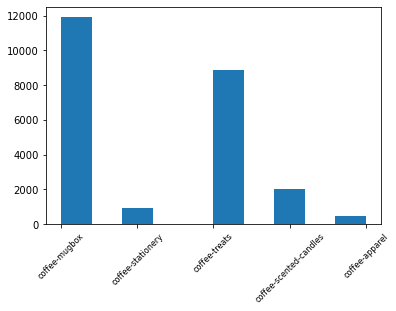

In [73]:
#Histogram to show the frequency of items sold
import matplotlib.pyplot as plt
plt.hist(transactions["item_name"])
plt.xticks(fontsize=8,rotation=45)
plt.show()

In [74]:
#Converting the timestamp to month year format
transactions['timestamp'] = baskets['timestamp'].apply(lambda x: x.strftime('%m-%Y'))      

In [75]:
#customer id from baskets is added as a new column to transactions as the column "id" "in baskets correspond to 
# the column basket_id in transactions.timestamp,dsicount_percentage,status are also copied in a similar way as its more convinient to have 
#the required columns in one dataframe

transactions[['customer_id']] = baskets[['customer_id']]
#transactions[['timestamp']] = baskets[['timestamp']]
transactions[['discount_percentage']] = baskets[['discount_percentage']]
transactions[['status']] = baskets[['status']]
# convert the price from cents to dollars
transactions['price']=transactions['price']/100 
print(transactions.head(10))


   id  basket_id      item_name  price  product_id timestamp  customer_id  \
0   5       1429  coffee-mugbox   15.0           1   04-2017       1008.0   
1   9       1378  coffee-mugbox   15.0           1   04-2017       1002.0   
2  10       1355  coffee-mugbox   15.0           1   04-2017       1001.0   
3  13       1337  coffee-mugbox   15.0           1   04-2017       1000.0   
4  16       1402  coffee-mugbox   15.0           1   04-2017       1005.0   
5  21       1501  coffee-mugbox   15.0           1   05-2017       1002.0   
6  26       1481  coffee-mugbox   15.0           1   05-2017       1001.0   
7  28       1562  coffee-mugbox   15.0           1   05-2017       1011.0   
8  32       1570  coffee-mugbox   15.0           1   05-2017       1013.0   
9  35       1594  coffee-mugbox   15.0           1   05-2017       1015.0   

   discount_percentage status  
0                  0.0   done  
1                  0.0   done  
2                  0.0   done  
3                  0.0  

In [76]:
# replacing status column values with numbers. there is no revenue if the item is returned or canceled by admin
transactions.status[transactions.status == 'done'] = 1
transactions.status[transactions.status == 'returned'] = 0
transactions.status[transactions.status == 'canceled_by_admin'] = 0

<ipython-input-76-387e4b3a966d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.status[transactions.status == 'done'] = 1
<ipython-input-76-387e4b3a966d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.status[transactions.status == 'returned'] = 0
<ipython-input-76-387e4b3a966d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.status[transactions.status == 'canceled_by_admin'] = 0


In [77]:
#Calculating revenue using the formula (price-price*discount percentage)*status 
#A few of the customers were admins but all them had a  100 percentage discount and hence 
#the revenue automatically becomes 0 when calculated using the below equation
transactions['revenue']=(transactions['price']-(transactions['price']*transactions['discount_percentage']/100
                        ))*(transactions['status'])
                                                               
print(transactions.head(15))

    id  basket_id      item_name  price  product_id timestamp  customer_id  \
0    5       1429  coffee-mugbox   15.0           1   04-2017       1008.0   
1    9       1378  coffee-mugbox   15.0           1   04-2017       1002.0   
2   10       1355  coffee-mugbox   15.0           1   04-2017       1001.0   
3   13       1337  coffee-mugbox   15.0           1   04-2017       1000.0   
4   16       1402  coffee-mugbox   15.0           1   04-2017       1005.0   
5   21       1501  coffee-mugbox   15.0           1   05-2017       1002.0   
6   26       1481  coffee-mugbox   15.0           1   05-2017       1001.0   
7   28       1562  coffee-mugbox   15.0           1   05-2017       1011.0   
8   32       1570  coffee-mugbox   15.0           1   05-2017       1013.0   
9   35       1594  coffee-mugbox   15.0           1   05-2017       1015.0   
10  38       1601  coffee-mugbox   15.0           1   05-2017       1018.0   
11  40       1503  coffee-mugbox   15.0           1   05-2017   

In [78]:
#Now we have an new dataframe which aggregates the
#total quantity of a single item purchased by the customer
transactions_new = transactions.groupby(['customer_id','revenue']).size().reset_index(name='quantity')
transactions_new[transactions_new['customer_id'] == 1253]
#print(transactions.head(200))

,customer_id,revenue,quantity
197,1253.0,20.0,1
198,1253.0,25.0,1
199,1253.0,30.0,3


In [79]:
#merging the transactions_new dataframe with the transactions dataframe and drop unnecessary columns

drop_cols=['status','discount_percentage','price','item_name','basket_id','id','customer_id','revenue']
transactions.drop(drop_cols, inplace=True, axis=1)
transactions[['customer_id']] = transactions_new[['customer_id']]
transactions[['revenue']] = transactions_new[['revenue']]
transactions[['quantity']] = transactions_new[['quantity']]
print(transactions.head(15))


    product_id timestamp  customer_id  revenue  quantity
0            1   04-2017          1.0      0.0      31.0
1            1   04-2017          2.0      0.0      31.0
2            1   04-2017          3.0      0.0      21.0
3            1   04-2017          4.0      0.0      11.0
4            1   04-2017          5.0      0.0       7.0
5            1   05-2017          6.0      0.0       2.0
6            1   05-2017       1000.0      0.0       1.0
7            1   05-2017       1000.0     15.0       1.0
8            1   05-2017       1001.0     15.0       2.0
9            1   05-2017       1002.0     15.0       2.0
10           1   05-2017       1005.0      0.0       1.0
11           1   05-2017       1005.0     15.0       9.0
12           1   05-2017       1008.0     15.0       3.0
13           1   05-2017       1011.0     15.0       2.0
14           1   06-2017       1013.0     15.0       2.0


In [80]:
transactions.loc[transactions['customer_id'] == 1253]

,product_id,timestamp,customer_id,revenue,quantity
197,1,06-2018,1253.0,20.0,1.0
198,1,06-2018,1253.0,25.0,1.0
199,2,06-2018,1253.0,30.0,3.0


In [81]:
#calculating the total purchase amount for a customer  and create a new dataframe with only the required columns
transactions['totalpurchase'] = transactions['quantity'] * transactions['revenue']
transactions.head()

,product_id,timestamp,customer_id,revenue,quantity,totalpurchase
0,1,04-2017,1.0,0.0,31.0,0.0
1,1,04-2017,2.0,0.0,31.0,0.0
2,1,04-2017,3.0,0.0,21.0,0.0
3,1,04-2017,4.0,0.0,11.0,0.0
4,1,04-2017,5.0,0.0,7.0,0.0


In [82]:
#creating a new dataframe by grouping customer_id
transactions_data=transactions.groupby(['customer_id','timestamp'],as_index=False).agg({
                                        'quantity': lambda quant: quant.sum(),
                                        'totalpurchase': lambda price: price.sum()})

transactions_data.columns=['customer_id','month_yr','Frequency','TotalSales']
transactions_data.head(10)



,customer_id,month_yr,Frequency,TotalSales
0,1.0,04-2017,31.0,0.0
1,2.0,04-2017,31.0,0.0
2,3.0,04-2017,21.0,0.0
3,4.0,04-2017,11.0,0.0
4,5.0,04-2017,7.0,0.0
5,6.0,05-2017,2.0,0.0
6,1000.0,05-2017,2.0,15.0
7,1001.0,05-2017,2.0,30.0
8,1002.0,05-2017,2.0,30.0
9,1005.0,05-2017,10.0,135.0


In [83]:
transactions.loc[transactions['customer_id'] == 1253]

,product_id,timestamp,customer_id,revenue,quantity,totalpurchase
197,1,06-2018,1253.0,20.0,1.0,20.0
198,1,06-2018,1253.0,25.0,1.0,25.0
199,2,06-2018,1253.0,30.0,3.0,90.0


### Calculating CLTV

In [84]:
# Here is how you can calculate month-to-month churn, 
#since this is a monthly subscription business this is important.


start = dt(year=2017, day=1, month=4)
end = dt(year=2020, day=1, month=1)

current= start
while current <= end:
    last_month_start = current - relativedelta(months=1)
    next_month_start = current + relativedelta(months=1)
    
    # CALCULATING MONTHLY CHURN
    if current==start:
        print(0.0) # can't be calculated since no customers from previous month exist
    else:
        this_month_customers = baskets[
                np.logical_and(
                    baskets.timestamp >= current,
                    baskets.timestamp < next_month_start)
            ].customer_id.unique()
        last_month_customers = baskets[
                np.logical_and(
                    baskets.timestamp >= last_month_start,
                    baskets.timestamp < current)
            ].customer_id.unique()
        # % of customers who were around last month but aren't around this month
       
        churn_rate=round(1-(np.mean(np.isin(last_month_customers, this_month_customers, assume_unique=True))),
                2)
        print(churn_rate   
                
        )
    current = next_month_start

0.0
0.0
0.33
0.5
0.33
0.38
0.08
0.31
0.33
0.29
0.33
0.36
0.5
0.29
0.17
0.22
0.48
0.36
0.41
0.27
0.16
0.29
0.24
0.17
0.22
0.2
0.18
0.19
0.21
0.2
0.18
0.19
0.2
0.21


In [85]:
#CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
#Customer Value = Average Order Value * Purchase Frequency

transactions_data['Order_value_avg']=transactions_data['TotalSales']/transactions_data['Frequency']


In [86]:
###  Calculate Purchase Frequency
total_customers=transactions_data.shape[0]
purchase_frequency=sum(transactions_data['Frequency'])/transactions_data.shape[0]
print(total_customers)

4006


In [87]:
#Calculate Profit Margin
#Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain.
#Let's assume our business has approx 5% profit on the total sale.
transactions_data['Profit_margin']=transactions_data['TotalSales']*0.05
transactions_data.head(10)


,customer_id,month_yr,Frequency,TotalSales,Order_value_avg,Profit_margin
0,1.0,04-2017,31.0,0.0,0.0,0.00
1,2.0,04-2017,31.0,0.0,0.0,0.00
2,3.0,04-2017,21.0,0.0,0.0,0.00
3,4.0,04-2017,11.0,0.0,0.0,0.00
4,5.0,04-2017,7.0,0.0,0.0,0.00
5,6.0,05-2017,2.0,0.0,0.0,0.00
6,1000.0,05-2017,2.0,15.0,7.5,0.75
7,1001.0,05-2017,2.0,30.0,15.0,1.50
8,1002.0,05-2017,2.0,30.0,15.0,1.50
9,1005.0,05-2017,10.0,135.0,13.5,6.75


In [88]:
# Customer Value
transactions_data['CLV']=(transactions_data['Order_value_avg']*purchase_frequency)/churn_rate

#Customer Lifetime Value(CLTF)
transactions_data['Cust_lifetime_value']=transactions_data['CLV']*transactions_data['Profit_margin']

#Top 5 customers based on CLTF
transactions_data=transactions_data.sort_values(['Cust_lifetime_value'], ascending=False)
transactions_data.head(200)
#Customer 1312 has the highest lifetime value

,customer_id,month_yr,Frequency,TotalSales,Order_value_avg,Profit_margin,CLV,Cust_lifetime_value
175,1312.0,10-2018,14.0,375.0,26.785714,18.75,665.424058,12476.701084
180,1322.0,10-2018,14.0,365.0,26.071429,18.25,647.679416,11820.149347
132,1237.0,06-2018,13.0,350.0,26.923077,17.50,668.836489,11704.638555
389,1740.0,03-2019,11.0,319.0,29.000000,15.95,720.432447,11490.897523
237,1432.0,01-2019,11.0,309.0,28.090909,15.45,697.848357,10781.757121
...,...,...,...,...,...,...,...,...
1070,3088.0,08-2019,6.0,159.0,26.500000,7.95,658.326201,5233.693299
408,1778.0,04-2019,6.0,159.0,26.500000,7.95,658.326201,5233.693299
1120,3191.0,08-2019,6.0,159.0,26.500000,7.95,658.326201,5233.693299
251,1463.0,01-2019,6.0,159.0,26.500000,7.95,658.326201,5233.693299


In [89]:
#Sorting by transaction date
transactions_data=transactions_data.sort_values(['month_yr'], ascending='False')
print(transactions_data)
#Last transaction was on 12-2019

      customer_id month_yr  Frequency  TotalSales  Order_value_avg  \
95         1169.0  01-2018        1.0        15.0        15.000000   
89         1158.0  01-2018        3.0        50.0        16.666667   
96         1170.0  01-2018        1.0         0.0         0.000000   
88         1156.0  01-2018        4.0        65.0        16.250000   
91         1163.0  01-2018        1.0        15.0        15.000000   
...           ...      ...        ...         ...              ...   
3648       8246.0  12-2019        1.0        12.0        12.000000   
3656       8265.0  12-2019        1.0        12.0        12.000000   
3657       8268.0  12-2019        1.0        12.0        12.000000   
3663       8277.0  12-2019        1.0        12.0        12.000000   
2997       6917.0  12-2019        2.0        39.0        19.500000   

      Profit_margin         CLV  Cust_lifetime_value  
95             0.75  372.637472           279.478104  
89             2.50  414.041636          1035.104

In [90]:
#Creating a new dataframe with combined Cust_lifetime_Value for each month
tm=transactions_data.groupby('month_yr',as_index=False).agg({'Cust_lifetime_value': lambda x: x.sum()})
tm.head()

,month_yr,Cust_lifetime_value
0,01-2018,9007.993342
1,01-2019,135481.130540
2,02-2018,7222.438787
3,02-2019,188569.494745
4,03-2018,6917.083081


In [91]:
#Creating a new dataframe with data only from the past 1 year
months=['01-2019','02-2019','03-2019','04-2019','05-2019','06-2019','07-2019','08-2019','09-2019','10-2019','11-2019','12-2019']
rslt_df = tm[tm['month_yr'].isin(months)] 
rslt_df.reset_index(drop=True, inplace=True)
#rslt_df.drop(['index'], axis = 1)
print(rslt_df)

   month_yr  Cust_lifetime_value
0   01-2019        135481.130540
1   02-2019        188569.494745
2   03-2019        256497.122254
3   04-2019        302361.466834
4   05-2019        371537.280435
5   06-2019        475124.592729
6   07-2019        571400.883507
7   08-2019        674439.563031
8   09-2019        766771.075573
9   10-2019        791887.338060
10  11-2019        771109.900685
11  12-2019        496379.197810


In [92]:
#Calculating number of customers in each month for the past 1 year
cust_no_jan=len(transactions_data.loc[transactions_data['month_yr'] == '01-2019'])
cust_no_feb=len(transactions_data.loc[transactions_data['month_yr'] == '02-2019'])
cust_no_mar=len(transactions_data.loc[transactions_data['month_yr'] == '03-2019'])
cust_no_apr=len(transactions_data.loc[transactions_data['month_yr'] == '04-2019'])
cust_no_may=len(transactions_data.loc[transactions_data['month_yr'] == '05-2019'])
cust_no_jun=len(transactions_data.loc[transactions_data['month_yr'] == '06-2019'])
cust_no_jul=len(transactions_data.loc[transactions_data['month_yr'] == '07-2019'])
cust_no_aug=len(transactions_data.loc[transactions_data['month_yr'] == '08-2019'])
cust_no_sep=len(transactions_data.loc[transactions_data['month_yr'] == '09-2019'])
cust_no_oct=len(transactions_data.loc[transactions_data['month_yr'] == '10-2019'])
cust_no_nov=len(transactions_data.loc[transactions_data['month_yr'] == '11-2019'])
cust_no_dec=len(transactions_data.loc[transactions_data['month_yr'] == '12-2019'])
x=[cust_no_jan,cust_no_feb,cust_no_mar,cust_no_apr,cust_no_may,cust_no_jun,cust_no_jul,cust_no_aug,cust_no_sep,cust_no_oct,cust_no_nov,cust_no_dec]
 
print(x)

[44, 61, 72, 99, 127, 168, 208, 268, 339, 467, 704, 1225]


In [93]:
#create a dataframe and add its "No of customers " column to existing dataframe
y = pd.DataFrame({'No of customers':x})
rslt_df["No of customers"]=y['No of customers'].values
print(rslt_df)

   month_yr  Cust_lifetime_value  No of customers
0   01-2019        135481.130540               44
1   02-2019        188569.494745               61
2   03-2019        256497.122254               72
3   04-2019        302361.466834               99
4   05-2019        371537.280435              127
5   06-2019        475124.592729              168
6   07-2019        571400.883507              208
7   08-2019        674439.563031              268
8   09-2019        766771.075573              339
9   10-2019        791887.338060              467
10  11-2019        771109.900685              704
11  12-2019        496379.197810             1225


<ipython-input-93-455cd65401dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["No of customers"]=y['No of customers'].values


In [94]:
#Create  new column which is calculated by dividing the combined Cust_lifetime_value by the number of customers that month
rslt_df["Avg_Cust_lifetime_value"]=rslt_df["Cust_lifetime_value"]/rslt_df["No of customers"]
print(rslt_df)

   month_yr  Cust_lifetime_value  No of customers  Avg_Cust_lifetime_value
0   01-2019        135481.130540               44              3079.116603
1   02-2019        188569.494745               61              3091.303193
2   03-2019        256497.122254               72              3562.460031
3   04-2019        302361.466834               99              3054.156231
4   05-2019        371537.280435              127              2925.490397
5   06-2019        475124.592729              168              2828.122576
6   07-2019        571400.883507              208              2747.119632
7   08-2019        674439.563031              268              2516.565534
8   09-2019        766771.075573              339              2261.861580
9   10-2019        791887.338060              467              1695.690231
10  11-2019        771109.900685              704              1095.326563
11  12-2019        496379.197810             1225               405.207508


<ipython-input-94-c1c06d9b57bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rslt_df["Avg_Cust_lifetime_value"]=rslt_df["Cust_lifetime_value"]/rslt_df["No of customers"]


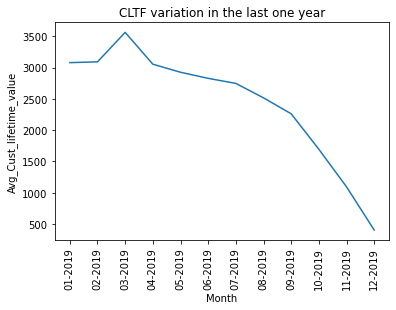

In [95]:
#plot showing change in Cust_lifetime_value(CLTF) in the past 1 year
x = rslt_df['month_yr']
y = rslt_df['Avg_Cust_lifetime_value']
plt.plot(x, y)
#plt.yscale("log")
plt.xticks(x,rotation='vertical')
plt.xlabel('Month')
plt.ylabel('Avg_Cust_lifetime_value')
plt.title('CLTF variation in the last one year')
plt.show()

#The plot shows  that the 1st 4 months have hardly any  fluctuations in CLTF except for a spike in March 2019 
#a  decline in the CLTF occurs from May 2019 
